In [1]:
# Belo Horizonte - Logit

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6,4
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (6,4)})

In [3]:
df = pd.read_excel(r"BeloHorizonte_ML_Std.xls")
df.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_BH
0,2.189400,0.696896,-0.998037,1.168642,1.167386,1
1,2.080311,0.575242,-1.052757,1.306965,1.297908,1
2,2.721430,0.301509,-1.186487,0.909275,1.058800,1
3,1.905134,0.254569,-1.208158,1.094816,1.235846,1
4,2.879854,0.487816,-1.101539,0.829424,0.997040,1


In [4]:
# Predicting Cartel
# define X and y
X = df.drop("Cartel_BH",axis = 1)
y = df.Cartel_BH

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [6]:
# train a logit model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=15000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=15000, penalty='none', solver='saga')

In [7]:
print(logreg.coef_, logreg.intercept_)

[[  3.73437145   8.92024836 -17.75208617  -2.9686815   -0.34440228]] [-5.92010758]


In [8]:
# make class predictions for the testing set
y_pred = logreg.predict(X_test)

In [9]:
## Null accuracy: accuracy that could be achieved by always predicting the most frequent class

y_test.value_counts()

0    82
1    67
Name: Cartel_BH, dtype: int64

In [10]:
#calculate the percentage of ones
Percentage_of_ones = y_test.mean()
print('Null Accuracy:', Percentage_of_ones)

Null Accuracy: 0.44966442953020136


In [11]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
#mean_squared_error(y_test, y_pred_class)

1.0


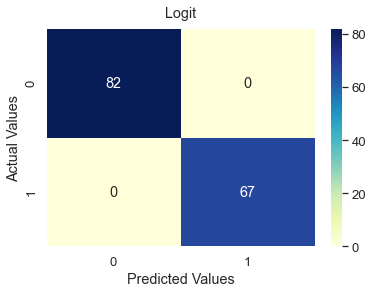

In [12]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.2) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Logit', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_Logistic_BH.png', dpi=600)

In [13]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        67

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



In [14]:
# store the predicted probabilities for class 1
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

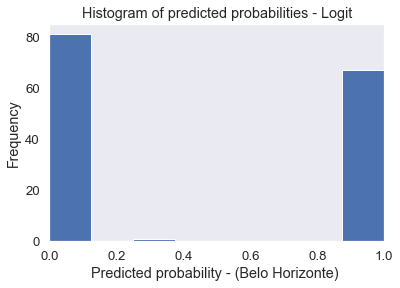

In [15]:
# histogram of predicted probabilities
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities - Logit')
plt.xlabel('Predicted probability - (Belo Horizonte) ')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Histogram_Logistic_BH.png', format='png')

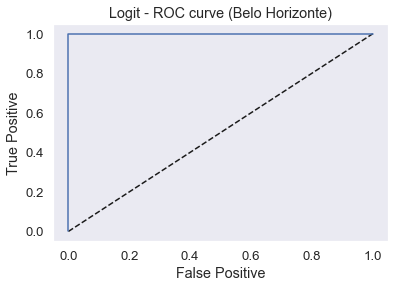

In [16]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Logit - ROC curve (Belo Horizonte)')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_Logistic_BH.png', format='png')

In [17]:
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [18]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
auc = cross_val_score(logreg, X_test, y_test, cv=5, scoring='roc_auc').mean()
print('AUC:',auc)

AUC: 1.0


In [19]:
import eli5
from eli5.sklearn import PermutationImportance

In [20]:
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.4416 ± 0.0559,Price_sd
0.1664 ± 0.0197,CV
0.0268 ± 0.0190,SPD
0.0067 ± 0.0085,Price_skewness
0 ± 0.0000,Price_kurtosis


In [21]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tpr[thresholds > threshold][-1])
    print('specificity:', 1 - fpr[thresholds > threshold][-1])

In [22]:
evaluate_threshold(0.5)

sensitivity: 1.0
specificity: 1.0


In [23]:
evaluate_threshold(0.6)

sensitivity: 1.0
specificity: 1.0


In [24]:
evaluate_threshold(0.7)

sensitivity: 1.0
specificity: 1.0


In [25]:
evaluate_threshold(0.8)

sensitivity: 1.0
specificity: 1.0


In [26]:
evaluate_threshold(0.9)

sensitivity: 1.0
specificity: 1.0


In [27]:
evaluate_threshold(0.99)

sensitivity: 1.0
specificity: 1.0


In [30]:
y_pred_proba[:50]

array([1.18025549e-10, 9.99999997e-01, 1.91088102e-03, 9.98305524e-01,
       3.53888191e-02, 1.59264475e-16, 9.97774410e-01, 9.99992631e-01,
       4.68068364e-05, 1.00000000e+00, 9.99507172e-01, 2.99560455e-11,
       1.72000043e-10, 9.99728075e-01, 9.99843988e-01, 1.44197334e-03,
       7.01361893e-12, 9.99999952e-01, 9.99799506e-01, 6.93268801e-15,
       3.01281313e-01, 3.47593137e-15, 5.20897483e-16, 9.99999999e-01,
       9.99999966e-01, 9.99508788e-01, 9.64059333e-11, 1.53532316e-14,
       1.00000000e+00, 1.00000000e+00, 6.95322961e-12, 1.00000000e+00,
       9.97806491e-01, 1.00000000e+00, 1.05925828e-10, 9.99999873e-01,
       9.95624530e-01, 9.99142844e-01, 2.13621060e-08, 8.40272094e-06,
       9.99886877e-01, 1.37718531e-10, 9.99994900e-01, 5.23756457e-16,
       1.00000000e+00, 1.00000000e+00, 8.35452896e-10, 9.98272164e-01,
       9.99998382e-01, 1.15528845e-11])

In [28]:
#Testing the Best Model estimated for Belo Horizonte (Logistic) in the Brasília's database

df_BRA= pd.read_excel(r"Brasilia_ML_Std.xls")
df_BRA.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_DF
0,-0.717529,-0.626223,-0.666778,-0.196953,-0.477565,1
1,-0.838328,-0.807425,-0.792635,0.885682,-0.286445,1
2,-0.516970,-0.574450,-0.631149,-1.795652,1.239965,1
3,-0.777291,-0.761828,-0.761104,-1.063986,0.201244,1
4,-0.716441,-0.647552,-0.681930,-0.602536,-0.301323,1


In [29]:
# Predicting the Cartel in Brasília
# define X and y
X_BRA = df_BRA.drop("Cartel_DF",axis = 1)
y_BRA = df_BRA.Cartel_DF

In [30]:
# summarize the dataset
print(X.shape, y.shape, X_BRA.shape, y_BRA.shape)

(496, 5) (496,) (489, 5) (489,)


In [31]:
# make class predictions for the testing set
y_pred_BRA = logreg.predict(X_BRA)

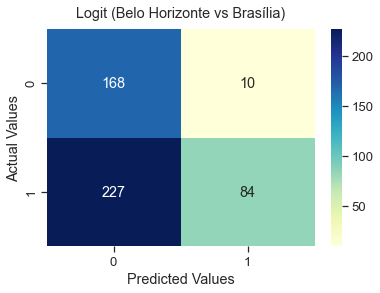

In [32]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_BRA, y_pred_BRA)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Logit (Belo Horizonte vs Brasília)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_Logistic_BH_vs_Brasilia.png', dpi=600)

In [33]:
print(classification_report(y_BRA,y_pred_BRA))

              precision    recall  f1-score   support

           0       0.43      0.94      0.59       178
           1       0.89      0.27      0.41       311

    accuracy                           0.52       489
   macro avg       0.66      0.61      0.50       489
weighted avg       0.72      0.52      0.48       489



In [34]:
from sklearn.metrics import roc_curve
y_pred_BRA_proba = logreg.predict_proba(X_BRA)[:,1]
fprBRA, tprBRA, thresholdsBRA = roc_curve(y_BRA, y_pred_BRA_proba)

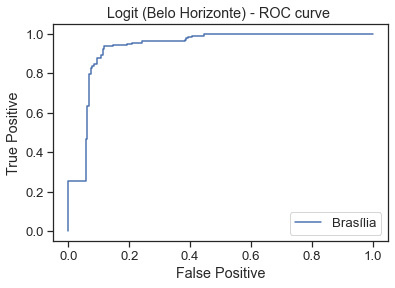

In [35]:
#plt.plot([0,1],[0,1],'k--')
plt.plot(fprBRA,tprBRA, label='Logit')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Logit (Belo Horizonte) - ROC curve ')
plt.legend(['Brasília'])
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_Logistic_BeloHorizonte_vs_BRA.png', format='png')

In [36]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auc_BRA = roc_auc_score(y_BRA,y_pred_BRA_proba)
print('AUC Belo Horizonte vs Brasília:',auc_BRA)

AUC Belo Horizonte vs Brasília: 0.9330539398099642


In [37]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprBRA[thresholdsBRA > threshold][-1])
    print('specificity:', 1 - fprBRA[thresholdsBRA > threshold][-1])

In [38]:
evaluate_threshold(0.5)

sensitivity: 0.27009646302250806
specificity: 0.9438202247191011


In [39]:
evaluate_threshold(0.6)

sensitivity: 0.2572347266881029
specificity: 0.9719101123595506


In [40]:
evaluate_threshold(0.7)

sensitivity: 0.1864951768488746
specificity: 1.0


In [41]:
evaluate_threshold(0.8)

sensitivity: 0.12540192926045016
specificity: 1.0


In [42]:
evaluate_threshold(0.9)

sensitivity: 0.10289389067524116
specificity: 1.0


In [43]:
evaluate_threshold(0.99)

sensitivity: 0.003215434083601286
specificity: 1.0


In [44]:
#Testing the Best Model estimated for Belo Horizonte (Logistic Classifier) in the Caxias do Sul's database
df_CS= pd.read_excel(r"CaxiasdoSul_ML_Std.xls")
df_CS.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_CS
0,-0.502234,-0.771008,-0.954957,-1.152634,0.981293,1
1,-0.011977,-0.384726,-0.753369,-2.024678,2.454060,1
2,-0.637640,-0.824221,-0.983101,-1.343260,1.275377,1
3,0.079973,-0.440566,-0.781865,-2.067829,2.904549,1
4,0.141272,-0.439377,-0.781214,-2.052522,2.963625,1


In [45]:
# Predicting the Cartel in Caxias do Sul
# define X and y
X_CS = df_CS.drop("Cartel_CS",axis = 1)
y_CS = df_CS.Cartel_CS

In [46]:
# summarize the dataset
print(X.shape, y.shape, X_CS.shape, y_CS.shape)

(496, 5) (496,) (484, 5) (484,)


In [47]:
# make class predictions for the testing set
y_pred_CS = logreg.predict(X_CS)

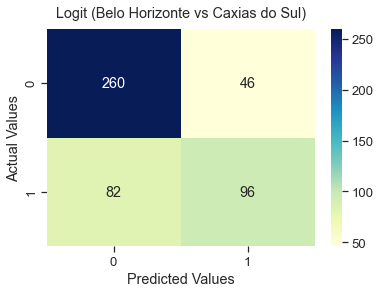

In [48]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_CS, y_pred_CS)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Logit (Belo Horizonte vs Caxias do Sul)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_Logistic_BH_vs_CS.png', dpi=600)

In [49]:
print(classification_report(y_CS,y_pred_CS))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       306
           1       0.68      0.54      0.60       178

    accuracy                           0.74       484
   macro avg       0.72      0.69      0.70       484
weighted avg       0.73      0.74      0.73       484



In [50]:
from sklearn.metrics import roc_curve
y_pred_CS_proba = logreg.predict_proba(X_CS)[:,1]
fprCS, tprCS, thresholdsCS = roc_curve(y_CS, y_pred_CS_proba)

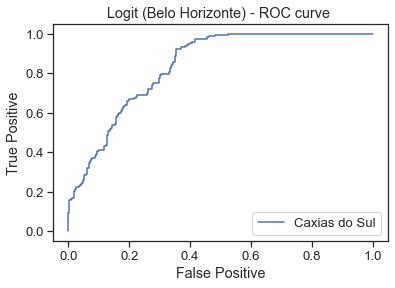

In [51]:
#plt.plot([0,1],[0,1],'k--')
plt.plot(fprCS,tprCS, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Logit (Belo Horizonte) - ROC curve ')
plt.legend(['Caxias do Sul'])
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_RandomForest_BeloHorizonte_vs_CS.png', format='png', dpi=600)

In [52]:
#Area under ROC curve
auc_CS = roc_auc_score(y_CS,y_pred_CS_proba)
print('AUC Belo Horizonte vs Caxias do Sul:',auc_CS)

AUC Belo Horizonte vs Caxias do Sul: 0.836325916134244


In [53]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprCS[thresholdsCS > threshold][-1])
    print('specificity:', 1 - fprCS[thresholdsCS > threshold][-1])

In [54]:
evaluate_threshold(0.5)

sensitivity: 0.5393258426966292
specificity: 0.8562091503267975


In [55]:
evaluate_threshold(0.6)

sensitivity: 0.5056179775280899
specificity: 0.869281045751634


In [56]:
evaluate_threshold(0.7)

sensitivity: 0.4101123595505618
specificity: 0.8823529411764706


In [57]:
evaluate_threshold(0.8)

sensitivity: 0.39325842696629215
specificity: 0.9052287581699346


In [58]:
evaluate_threshold(0.9)

sensitivity: 0.3202247191011236
specificity: 0.9313725490196079


In [59]:
evaluate_threshold(0.99)

sensitivity: 0.16292134831460675
specificity: 0.9869281045751634


In [60]:
#Testing the Best Model estimated for Belo Horizonte (Logistic Classifier) in São Luís
df_SL= pd.read_excel(r"SaoLuis_ML_Std.xls")
df_SL.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_SL
0,-1.512210,-1.415126,-1.523575,0.530595,-0.372297,1
1,-1.590998,-1.423813,-1.531361,0.465319,-0.465210,1
2,-1.472599,-1.390720,-1.500943,0.277075,-0.523992,1
3,-1.891792,-1.794681,-1.874691,0.988610,-0.150930,1
4,-1.512210,-1.424056,-1.531331,-0.390301,-0.859725,1


In [61]:
# Predicting the Cartel in Caxias do Sul
# define X and y
X_SL = df_SL.drop("Cartel_SL",axis = 1)
y_SL = df_SL.Cartel_SL

In [62]:
# summarize the dataset
print(X.shape, y.shape, X_SL.shape, y_SL.shape)

(496, 5) (496,) (449, 5) (449,)


In [63]:
# make class predictions for the testing set
y_pred_SL = logreg.predict(X_SL)

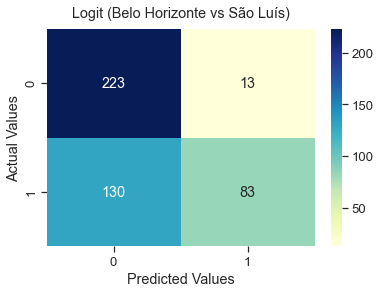

In [64]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_SL, y_pred_SL)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Logit (Belo Horizonte vs São Luís)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_Logistic_BH_vs_SL.png', dpi=600)

In [65]:
print(classification_report(y_SL,y_pred_SL))

              precision    recall  f1-score   support

           0       0.63      0.94      0.76       236
           1       0.86      0.39      0.54       213

    accuracy                           0.68       449
   macro avg       0.75      0.67      0.65       449
weighted avg       0.74      0.68      0.65       449



In [66]:
y_pred_SL_proba = logreg.predict_proba(X_SL)[:,1]
fprSL, tprSL, thresholdsSL = roc_curve(y_SL, y_pred_SL_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auc_SL = roc_auc_score(y_SL,y_pred_SL_proba)
print('AUC Belo Horizonte vs São Luís:',auc_SL)

AUC Belo Horizonte vs São Luís: 0.9168457070104241


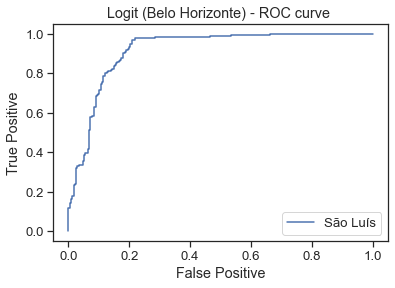

In [67]:
#plt.plot([0,1],[0,1],'k--')
plt.plot(fprSL,tprSL, label='Logit')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Logit (Belo Horizonte) - ROC curve ')
plt.legend(['São Luís'])
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_RandomForest_BeloHorizonte_vs_SL.png', format='png', dpi=600)

In [68]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprSL[thresholdsSL > threshold][-1])
    print('specificity:', 1 - fprSL[thresholdsSL > threshold][-1])

In [69]:
evaluate_threshold(0.5)

sensitivity: 0.38497652582159625
specificity: 0.9449152542372882


In [70]:
evaluate_threshold(0.6)

sensitivity: 0.3568075117370892
specificity: 0.9491525423728814


In [71]:
evaluate_threshold(0.7)

sensitivity: 0.3192488262910798
specificity: 0.9703389830508474


In [72]:
evaluate_threshold(0.8)

sensitivity: 0.23943661971830985
specificity: 0.9745762711864406


In [73]:
evaluate_threshold(0.9)

sensitivity: 0.1784037558685446
specificity: 0.9830508474576272


In [74]:
evaluate_threshold(0.99)

sensitivity: 0.11737089201877934
specificity: 0.9957627118644068


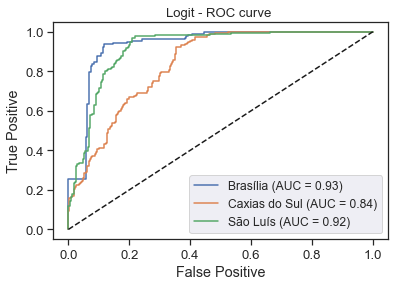

In [75]:
plt.plot(fprBRA, tprBRA, fprCS,tprCS, fprSL, tprSL, label='Logistic')
sns.set(font_scale=1.1) # Adjust to fit
plt.xlabel('False Positive')#False Positive Rate
plt.ylabel('True Positive')#True Positive Rate
plt.title('Logit - ROC curve ')
plt.legend(['Brasília (AUC = 0.93)', 'Caxias do Sul (AUC = 0.84)', 'São Luís (AUC = 0.92)'])
plt.grid(False)
plt.plot([0,1],[0,1],'k--')
sns.set_style("ticks")
plt.savefig('ROC_Logit_BeloHorizonte_vs_BRA_CS_SL.png', format='png', dpi=600)
plt.show()